# Create Figure 1 Notebook: EGFR

This notebooks makes figure 1. It shows the mutation type abundance for the different cancer 

In [1]:
import cptac
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plot_utils as p


/Users/Lindsey/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Step 1 Create data frames with Mutation Types 

For each cancer type we need to create a df that has the mutation type for each sample 


First, load in cptac datasets

In [2]:
en = cptac.Endometrial()
hn = cptac.Hnscc()
l = cptac.Luad()
o = cptac.Ovarian()
c = cptac.Ccrcc()
col = cptac.Colon()
g = cptac.Gbm()
b = cptac.Brca()
ls = cptac.Lscc()

cptac warning: The HNSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


cptac warning: The LUAD dataset is under publication embargo until July 01, 2020. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 3)


cptac warning: The GBM dataset is under publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 7)


version 3scc v3.2.......                 


cptac warning: The LSCC data is currently strictly reserved for CPTAC investigators. Otherwise, you are not authorized to access these data. Additionally, even after these data become publicly available, they will be subject to a publication embargo (see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details). (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 9)


Second, call get_geneotype_all_vars for EGFR for each cancer type. This returns a df with mutation, location, and mutation_status. 

In [4]:
endo = en.get_genotype_all_vars("EGFR")
gbm = g.get_genotype_all_vars("EGFR")
hnscc = hn.get_genotype_all_vars("EGFR")
ovar = o.get_genotype_all_vars("EGFR")
cc = c.get_genotype_all_vars("EGFR")
colon = col.get_genotype_all_vars("EGFR")
ld = l.get_genotype_all_vars("EGFR")
brca = b.get_genotype_all_vars("EGFR")
lscc = ls.get_genotype_all_vars("EGFR")

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 91 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 313)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 83 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 313)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: C3L-01834 (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 313)
cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 107 samples for the EGFR gene (/Users/Lindsey/anaconda3/lib/python

# Step 2: Match Mutation Labels

Change labels to to match desired final figure. 

In [26]:

#Drop Silent mutation type
indexNames = hnscc[ hnscc['Mutation'] == "Silent" ].index
hnscc.drop(indexNames , inplace=True)
indexNames = ld[ ld['Mutation'] == "Silent" ].index
ld.drop(indexNames , inplace=True)
indexNames = brca[ brca['Mutation'] == "Silent" ].index
brca.drop(indexNames , inplace=True)


In [27]:
#combine to make indel mutation type 
ovar["Mutation"] = ovar['Mutation'].replace(['In_Frame_Del'], 'Indel')
ld["Mutation"] = ld['Mutation'].replace(['In_Frame_Del'], 'Indel')
lscc["Mutation"] = lscc['Mutation'].replace(['In_Frame_Del'], 'Indel')
colon["Mutation"] = colon['Mutation'].replace(['nonframeshift insertion'], 'Indel')
#combine to make truncation muatation type
endo["Mutation"] = endo['Mutation'].replace(['Nonsense_Mutation'], 'Truncating')

lscc["Mutation"] = lscc['Mutation'].replace(['Nonsense_Mutation'], 'Truncating')


In [28]:
# update missense label 
colon["Mutation"] = colon['Mutation'].replace(['nonsynonymous SNV'], 'Missense')
endo["Mutation"] = endo['Mutation'].replace(['Missense_Mutation'], 'Missense')
gbm["Mutation"] = gbm['Mutation'].replace(['Missense_Mutation'], 'Missense')
hnscc["Mutation"] = hnscc['Mutation'].replace(['Missense_Mutation'], 'Missense')
ld["Mutation"] = ld['Mutation'].replace(['Missense_Mutation'], 'Missense')
brca["Mutation"] = brca['Mutation'].replace(['Missense_Mutation'], 'Missense')
lscc["Mutation"] = lscc['Mutation'].replace(['Missense_Mutation'], 'Missense')
cc["Mutation"] = cc['Mutation'].replace(['Missense_Mutation'], 'Missense')
ovar["Mutation"] = ovar['Mutation'].replace(['Missense_Mutation'], 'Missense')

In [29]:
# drop _Tumor 
endo["Mutation"] = endo['Mutation'].replace(['Wildtype_Tumor'], 'Wildtype')
gbm["Mutation"] = gbm['Mutation'].replace(['Wildtype_Tumor'], 'Wildtype')
hnscc["Mutation"] = hnscc['Mutation'].replace(['Wildtype_Tumor'], 'Wildtype')
colon["Mutation"] = colon['Mutation'].replace(['Wildtype_Tumor'], 'Wildtype')
ld["Mutation"] = ld['Mutation'].replace(['Wildtype_Tumor'], 'Wildtype')
brca["Mutation"] = brca['Mutation'].replace(['Wildtype_Tumor'], 'Wildtype')
cc["Mutation"] = cc['Mutation'].replace(['Wildtype_Tumor'], 'Wildtype')
ovar["Mutation"] = ovar['Mutation'].replace(['Wildtype_Tumor'], 'Wildtype')

lscc["Mutation"] = lscc['Mutation'].replace(['Wildtype_Tumor'], 'Wildtype')

# Step 3: Create figure 

Put dfs into a list. Create list of names for figure legend. 
Call plot_mutations function

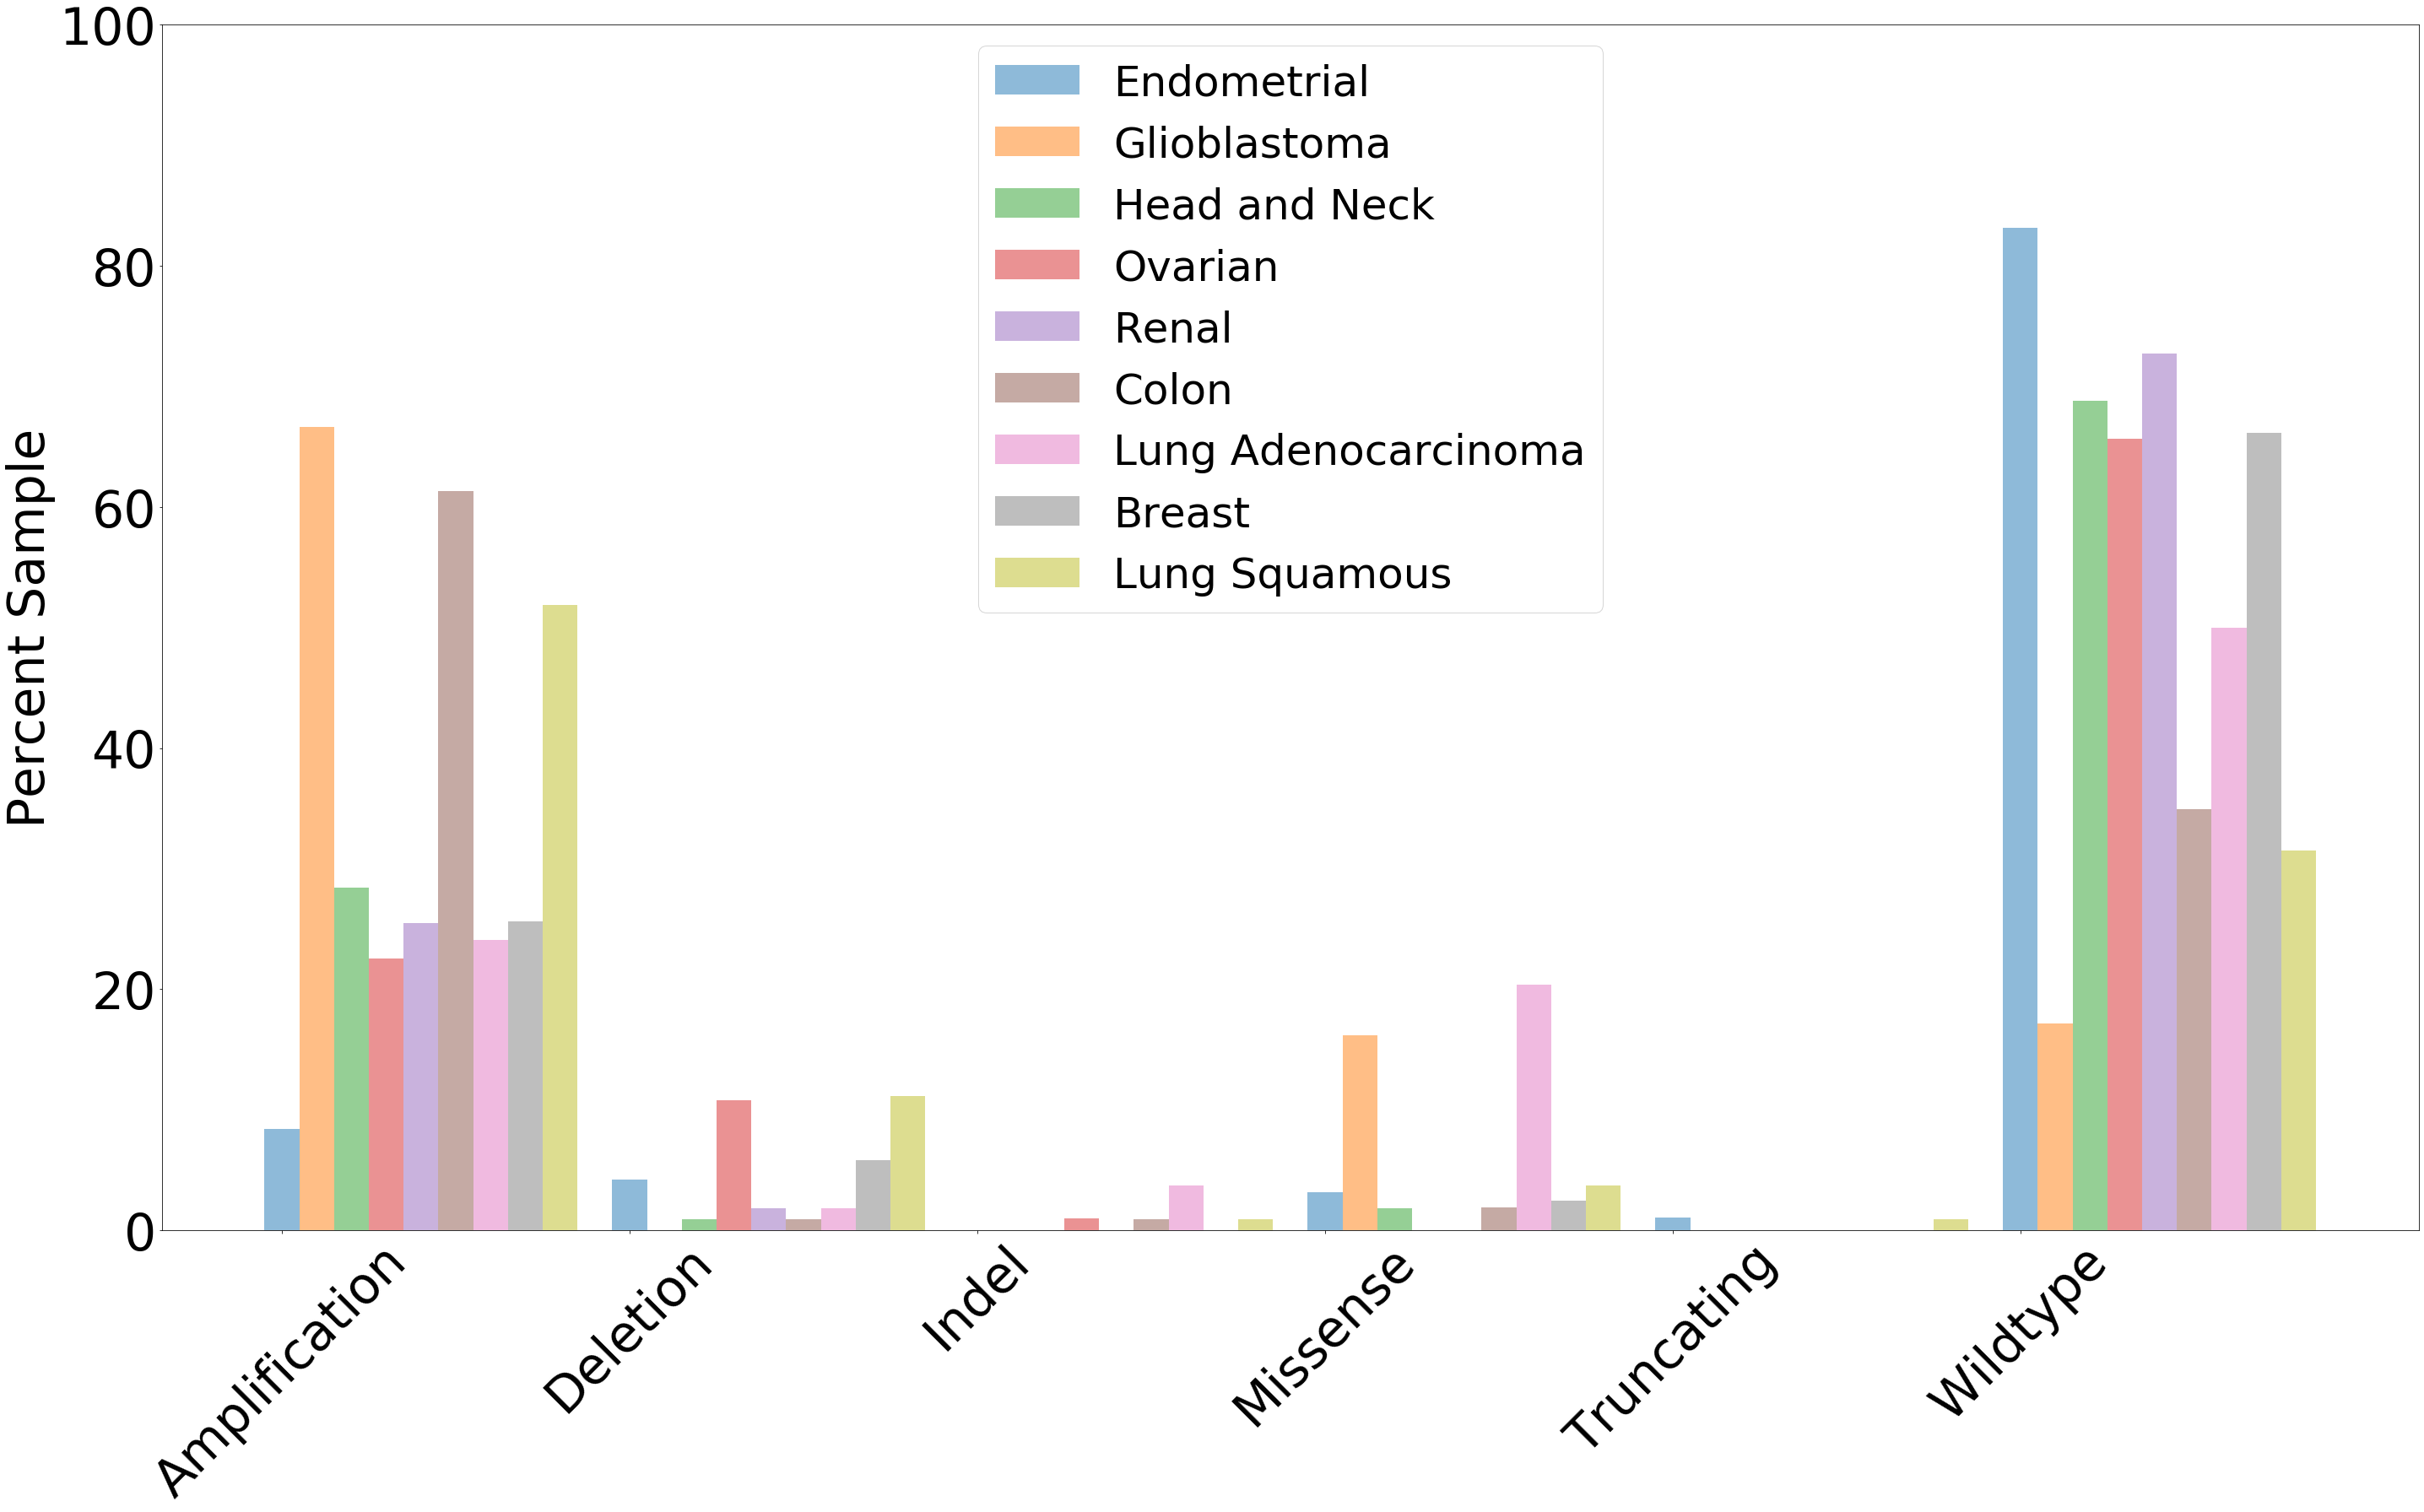

In [47]:
dfs = [endo, gbm, hnscc, ovar, cc, colon, ld, brca, lscc]
names = ['Endometrial', 'Glioblastoma', 'Head and Neck', 'Ovarian', 'Renal', 'Colon', 'Lung Adenocarcinoma', 'Breast',"Lung Squamous"]
p.figure1_plot_mutations(dfs, names, save_to_path = "Step1_EGFR.png")

In [48]:
i = 0
for cancer in dfs:

    vc = cancer.Mutation.value_counts()
    total = len(cancer)
    cnv_amp = vc.Amplification
    print(names[i])
    print('total_samples:',total,'\n')
    print(cnv_amp,'/',total,'=', cnv_amp/total,'\n')
    i += 1
   

Endometrial
total_samples: 95 

8 / 95 = 0.08421052631578947 

Glioblastoma
total_samples: 99 

66 / 99 = 0.6666666666666666 

Head and Neck
total_samples: 109 

31 / 109 = 0.28440366972477066 

Ovarian
total_samples: 102 

23 / 102 = 0.22549019607843138 

Renal
total_samples: 110 

28 / 110 = 0.2545454545454545 

Colon
total_samples: 106 

65 / 106 = 0.6132075471698113 

Lung Adenocarcinoma
total_samples: 108 

26 / 108 = 0.24074074074074073 

Breast
total_samples: 121 

31 / 121 = 0.256198347107438 

Lung Squamous
total_samples: 108 

56 / 108 = 0.5185185185185185 

